In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X_dataset = pd.read_csv("logisticX.csv", header=None)
Y_dataset = pd.read_csv("logisticY.csv", header=None)
X = np.array(X_dataset)
X1 = np.array(X[:,0])
X2 = np.array(X[:,1])
Y = np.array(Y_dataset).reshape(-1)

In [3]:
# Data Normalization
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)

M = X1.size
# Converting into 2D  array
x0 = np.array([np.ones(M)])
x1 = np.array([X1])
x2 = np.array([X2])

X_norm = np.concatenate((x0, x1, x2), axis=0)

In [4]:
# Initaializing Thetas
Theta = np.zeros(3)

# Maximum log likelihood calculation
def MLL(X,Theta,Y,m):
    n = np.matmul(Theta, X)  #1by100
    h = (1/(1+ np.exp(-n)))    #1by100
    L_theta = 0
    for i in range(m):
        L_theta += (Y[i]*np.log(h[i]) + (1-Y[i])*np.log(1-h[i]))

    return L_theta

# Storng log likelihood values
LL = np.array([MLL(X_norm, Theta, Y, Y.size)])

# Optimizing log liklihood using newton's method
def newopt(X,Theta,Y,m):
    n = np.matmul(Theta, X)  #1by100
    h = (1/(1+ np.exp(-n)))    #1by100
    err2 = Y - h
    d_theta = np.zeros(3)
    for j in range(m):
        d_theta += err2[j] * X[:,j]

    I = np.identity(Y.size)
    temp = I * np.dot(h,np.transpose(1-h))
    Hes = np.matmul(X, np.matmul(temp, np.transpose(X)))
    Theta += np.matmul(np.linalg.inv(Hes),np.transpose(d_theta))
    return Theta, d_theta
    

In [5]:
cond = True
itr = 1
# Keep updating Thetas using optimization until log likihood function maximize
while(cond):
    Theta, d_Theta =  newopt(X_norm, Theta, Y, Y.size)
    L = MLL(X_norm, Theta, Y, Y.size)
    LL = np.append(LL, L)
    if abs(LL[-2]-LL[-1]) <= 0.0001:
        cond = False
    else:
        itr += 1
print("Final Theta is: ",Theta)

Final Theta is:  [ 0.35211649  2.44761566 -2.57164248]


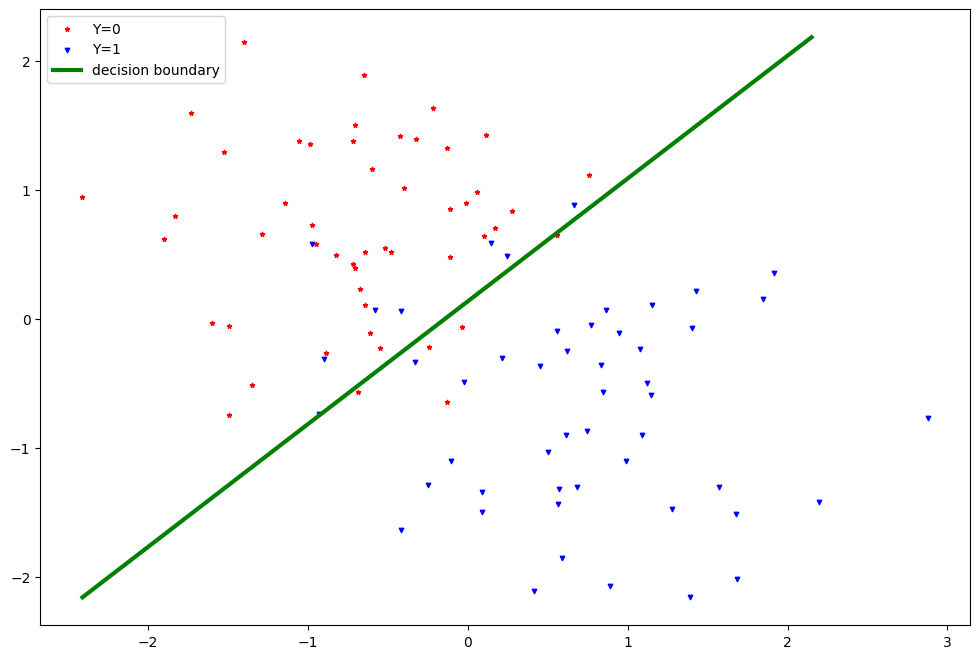

In [6]:
# Plots
elem_0 = []
elem_1 = []

for i in range(Y.size):
    if Y[i] == 0:
        elem_0.append(np.array([X1[i],X2[i]]))
    elif Y[i] == 1:
        elem_1.append(np.array([X1[i],X2[i]]))

elem_0 = np.array(elem_0)
elem_1 = np.array(elem_1)

fig = plt.figure()
fig.set_size_inches(12,8)

plt.scatter(elem_0[:,0], elem_0[:,1], marker='*', c = 'r', s=10, label = "Y=0")
plt.scatter(elem_1[:,0], elem_1[:,1], marker='v', c = 'b', s=10, label = "Y=1")

ax1 = np.linspace(np.min(X1), np.max(X2),20)
ax2 = -(Theta[0] + Theta[1]*ax1)/Theta[2]
plt.plot(ax1, ax2, 'g', linewidth = 3, label = "decision boundary")
plt.legend()
plt.show()
